In [1]:
import pandas as pd

In [5]:
# Load data
annomi = pd.read_csv("..\data\AnnoMI\AnnoMI-simple.csv")
annomi

,transcript_id,mi_quality,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,main_therapist_behaviour,client_talk_type
0,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,question,NaN
1,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,NaN,neutral
2,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",therapist_input,NaN
3,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,NaN,neutral
4,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,therapist_input,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9694,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,376,therapist,00:26:45,You know maybe they'll walk that road with you...,other,NaN
9695,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,377,client,00:26:49,"Yeah, okay, uh, all right, yeah. All right.",NaN,change
9696,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,378,therapist,00:26:52,There's a couple of people.,other,NaN
9697,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,379,client,00:26:54,Yeah.,NaN,change


In [9]:
annomi['mi_quality'].value_counts(normalize=True)

mi_quality
high    0.911331
low     0.088669
Name: proportion, dtype: float64

In [27]:
timestamp = r'\b(\d{1,2}:[0-5][0-9]:[0-5][0-9])\b'
annomi['utterance_text'] = annomi['utterance_text'].str.replace(r'\[unintelligible ' + timestamp + r'\]', '<UNK>', regex=True)

In [28]:
client = annomi[annomi['interlocutor'] == 'client']
client

,transcript_id,mi_quality,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,main_therapist_behaviour,client_talk_type
1,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,NaN,neutral
3,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,NaN,neutral
5,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,5,client,00:00:39,Usually three drinks and glasses of wine.,NaN,neutral
7,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,7,client,00:00:46,Something like that.,NaN,neutral
9,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,9,client,00:01:03,Okay.,NaN,neutral
...,...,...,...,...,...,...,...,...,...,...,...
9689,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,371,client,00:26:21,Hmm.,NaN,change
9691,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,373,client,00:26:33,There's Fiona.,NaN,change
9693,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,375,client,00:26:36,"<UNK> getting out so what-what he did. Um, dad...",NaN,change
9695,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,377,client,00:26:49,"Yeah, okay, uh, all right, yeah. All right.",NaN,change


In [33]:
# Get the minimum length
min_length = client['utterance_text'].str.split().apply(len).min()

# Get the maximum length
max_length = client['utterance_text'].str.split().apply(len).max()

# Get the average length
avg_length = client['utterance_text'].str.split().apply(len).mean()

min_length, max_length, avg_length


(1, 246, 14.965123520863608)

<Axes: >

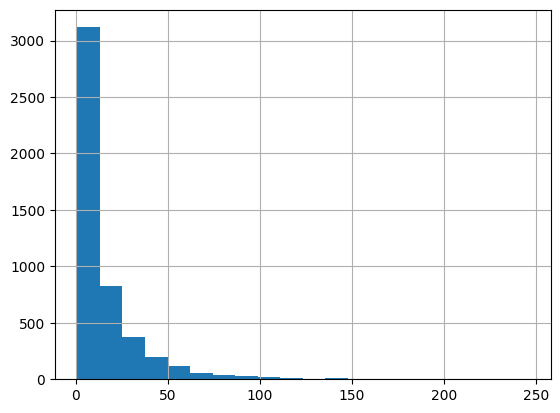

In [34]:
client['utterance_text'].str.split().apply(len).hist(bins=20)

In [35]:
client['utterance_text'].str.split().apply(len).describe()

count    4817.000000
mean       14.965124
std        20.383716
min         1.000000
25%         2.000000
50%         8.000000
75%        20.000000
max       246.000000
Name: utterance_text, dtype: float64

In [39]:
client[(client['utterance_text'].str.split().apply(len) >= 150)].count()

transcript_id               4
mi_quality                  4
video_title                 4
video_url                   4
topic                       4
utterance_id                4
interlocutor                4
timestamp                   4
utterance_text              4
main_therapist_behaviour    0
client_talk_type            4
dtype: int64